<a href="https://colab.research.google.com/github/yudhapatria96/Scrape-and-Sentiment-Analysis-Google-Playstore-Review/blob/main/Scrapping_and_Sentimen_AnalysisGoogle_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
  !pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 786 kB/s 


In [ ]:
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string

from sklearn.model_selection import train_test_split 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score,precision_score, confusion_matrix

  
from tqdm import tqdm

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app


#Setup Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/MyDrive/Semua Tentang Data/Google Playstore Review Scrape/"

Mounted at /content/gdrive


# Scrape Googel Playstore Reviews

In [ ]:
app_packages = [
    'com.grabtaxi.passenger',
    'com.gojek.app'   
]

In [ ]:
app_infos = []

for application in tqdm(app_packages):
  info = app(application, lang='id', country='id')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys = True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "5.0",
  "androidVersionText": "5.0 dan yang lebih tinggi",
  "appId": "com.grabtaxi.passenger",
  "containsAds": false,
  "contentRating": "Rating 3+",
  "contentRatingDescription": null,
  "currency": "IDR",
  "description": "Grab adalah aplikasi super terkemuka di Asia Tenggara. Kami menawarkan layanan esensial untuk kebutuhan sehari-hari ke lebih dari 670 juta orang di Singapura, Indonesia, Malaysia, Thailand, Filipina, Vietnam, Kamboja, dan Myanmar. Layanan esensial ini terdiri dari Pengiriman (makanan, belanjaan, paket), Transportasi (roda 4, roda 3, roda 2), Keuangan (pinjaman, asuransi, pembayaran nontunai, manajemen harta), Usaha, dan Lain-lain. Misi kami adalah memajukan Asia Tenggara dengan melakukan pemberdayaan ekonomi untuk semua orang di wilayah ini.\r\n\r\n\r\nPengiriman makanan yang memenuhi keinginanmu\r\nGrabFood: Pesan dari restoran favoritmu dan makanan akan dikirim langsung ke rumahmu\r\n\r\nPengiriman belanjaan yang mu

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]


In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv(path +'apps.csv', index =None, header= True)

In [ ]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
          ap,
          lang='id',
          country = 'id',
          sort = sort_order,
          count=200 if score == 3 else 100,
          filter_score_with = score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 2/2 [00:13<00:00,  6.90s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.grabtaxi.passenger",
  "at": "2021-07-24 02:25:49",
  "content": "Dulu, isi saldo itu kepotong langsung dari saldo ATM (ad Ket admin 1.000), sekarang tau2 kepotong dari saldo yg udh masuk, ngikut si Oren food.. alhasil gue jadi harus ngisi ovo lagi, dan kena biaya admin jadi 2x, nyesek bgt sumpah.. udh admin mahal, kadang Nemu driver yg bacot A-Z kalo pas pesen makanan bayar ditmpt, masa musti di telponin terus -_- bad bgt sih..",
  "repliedAt": "2021-07-24 03:10:17",
  "replyContent": "Maaf jd bikin gak nyaman ya Kak\u2639\ufe0f ,\nUntuk penanganan kendala maupun pertanyaannya, agar lebih cepat ditangani bs Kakak sampaikan melalui DM atau Personal Message di:\nTwitter: @GrabID, Facebook: Grab atau melalui Help Center pd aplikasi Grab ya.\n\nNantinya ada tim kami yang akan dgn senang hati bantu Kakak. Terima kasih",
  "reviewCreatedVersion": "5.157.0",
  "reviewId": "gp:AOqpTOGdPKr76-yIu-wFcp5RjnzA4vibyJLXiUkBsMlOWK7Uc_WVF-kPllWWwmICwZwyh0Ma0Q6I5cgZI-yGUbI",
  "score"

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

app_reviews_df = app_reviews_df.sort_values(["appId","at"])


In [ ]:
app_reviews_df.to_csv(path+'hasilreviews.csv', index=None, header=True)

In [ ]:
app_reviews_df.isnull()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
1779,False,False,False,False,False,False,False,False,False,False,False,False
1775,False,False,False,False,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False,False,False,False,False
1754,False,False,False,False,False,False,False,False,False,False,False,False
1716,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1102,False,False,False,False,False,False,False,False,True,True,False,False
1101,False,False,False,False,False,False,False,False,True,True,False,False
899,False,False,False,False,False,False,False,False,True,True,False,False
1100,False,False,False,False,False,False,False,False,True,True,False,False


#Monthly Average Rating

In [ ]:
app_reviews_df.fillna("No Replay", inplace=True)
app_reviews_df.isnull()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
1779,False,False,False,False,False,False,False,False,False,False,False,False
1775,False,False,False,False,False,False,False,False,False,False,False,False
1792,False,False,False,False,False,False,False,False,False,False,False,False
1754,False,False,False,False,False,False,False,False,False,False,False,False
1716,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1102,False,False,False,False,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False,False,False,False,False
899,False,False,False,False,False,False,False,False,False,False,False,False
1100,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
app_reviews_df = app_reviews_df.set_index('appId', inplace=False)

app_reviews_gojek_df = app_reviews_df.loc['com.gojek.app']
app_reviews_grab_df = app_reviews_df.loc['com.grabtaxi.passenger']

In [ ]:
print(app_reviews_gojek_df)
print(app_reviews_grab_df)

                                                        reviewId  ...      sortOrder
appId                                                             ...               
com.gojek.app  gp:AOqpTOE_Ok_CBnNrHbFAVd0BOSRp63M9x3lGvhnzAJh...  ...  most_relevant
com.gojek.app  gp:AOqpTOEmMdTi3MtLoGJ2eJwszHbASSkK11Z1YkEQJ_U...  ...  most_relevant
com.gojek.app  gp:AOqpTOHFDMJTEYCp5C0AC9HSQ0E7EpY3ialnY5gpF40...  ...  most_relevant
com.gojek.app  gp:AOqpTOF4jzkCB7LqoxhNtaHs5l7YYQJYrCCnnMfk4VY...  ...  most_relevant
com.gojek.app  gp:AOqpTOGptSLBHewv13M4zfS9Lk1AoCB8TDAYCa3TxA7...  ...  most_relevant
...                                                          ...  ...            ...
com.gojek.app  gp:AOqpTOEqiwvMjlW8qVUOUnTD_mH38vgy1R83D23sg0x...  ...         newest
com.gojek.app  gp:AOqpTOF3_UWf3iXiCco3DMUnvlQWsD3KQhQSxL5ZthE...  ...         newest
com.gojek.app  gp:AOqpTOHh2Thc64STNQyxhYgI9LhQnGk4tIV2izqwHAk...  ...         newest
com.gojek.app  gp:AOqpTOESsF2X0df8GszA_SLhttOiekHYmjpoQ0wMzwE... 

In [ ]:
app_reviews_gojek_df.reset_index(level=0, inplace=True)
app_reviews_grab_df.reset_index(level=0, inplace=True)

print(app_reviews_gojek_df)
print(app_reviews_grab_df)

              appId  ...      sortOrder
0     com.gojek.app  ...  most_relevant
1     com.gojek.app  ...  most_relevant
2     com.gojek.app  ...  most_relevant
3     com.gojek.app  ...  most_relevant
4     com.gojek.app  ...  most_relevant
...             ...  ...            ...
1195  com.gojek.app  ...         newest
1196  com.gojek.app  ...         newest
1197  com.gojek.app  ...         newest
1198  com.gojek.app  ...         newest
1199  com.gojek.app  ...         newest

[1200 rows x 12 columns]
                       appId  ...      sortOrder
0     com.grabtaxi.passenger  ...  most_relevant
1     com.grabtaxi.passenger  ...  most_relevant
2     com.grabtaxi.passenger  ...  most_relevant
3     com.grabtaxi.passenger  ...  most_relevant
4     com.grabtaxi.passenger  ...  most_relevant
...                      ...  ...            ...
1194  com.grabtaxi.passenger  ...         newest
1195  com.grabtaxi.passenger  ...         newest
1196  com.grabtaxi.passenger  ...         newest
1197

In [ ]:
print(app_reviews_gojek_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   appId                 1200 non-null   object        
 1   reviewId              1200 non-null   object        
 2   userName              1200 non-null   object        
 3   userImage             1200 non-null   object        
 4   content               1200 non-null   object        
 5   score                 1200 non-null   int64         
 6   thumbsUpCount         1200 non-null   int64         
 7   reviewCreatedVersion  1200 non-null   object        
 8   at                    1200 non-null   datetime64[ns]
 9   replyContent          1200 non-null   object        
 10  repliedAt             1200 non-null   object        
 11  sortOrder             1200 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 112.6+ KB
None


In [ ]:
app_reviews_gojek_mei = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-05']
app_reviews_gojek_juni = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-06']
app_reviews_gojek_juli = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2021-07']

#membuat kolom baru
app_reviews_gojek_mei["average_rating"]  = app_reviews_gojek_mei["score"].mean()
app_reviews_gojek_juni["average_rating"] = app_reviews_gojek_juni["score"].mean()
app_reviews_gojek_juli["average_rating"] = app_reviews_gojek_juli["score"].mean()

print(app_reviews_gojek_mei['average_rating'])
print(app_reviews_gojek_juni['average_rating'])
print(app_reviews_gojek_juli['average_rating'])

0     3.229167
1     3.229167
2     3.229167
3     3.229167
4     3.229167
5     3.229167
6     3.229167
7     3.229167
8     3.229167
9     3.229167
10    3.229167
11    3.229167
12    3.229167
13    3.229167
14    3.229167
15    3.229167
16    3.229167
17    3.229167
18    3.229167
19    3.229167
20    3.229167
21    3.229167
22    3.229167
23    3.229167
24    3.229167
25    3.229167
26    3.229167
27    3.229167
28    3.229167
29    3.229167
30    3.229167
31    3.229167
32    3.229167
33    3.229167
34    3.229167
35    3.229167
36    3.229167
37    3.229167
38    3.229167
39    3.229167
40    3.229167
41    3.229167
42    3.229167
43    3.229167
44    3.229167
45    3.229167
46    3.229167
47    3.229167
Name: average_rating, dtype: float64
48     3.010526
49     3.010526
50     3.010526
51     3.010526
52     3.010526
         ...   
138    3.010526
139    3.010526
140    3.010526
141    3.010526
142    3.010526
Name: average_rating, Length: 95, dtype: float64
143     2.988647
1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
app_reviews_grab_mei = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-05']
app_reviews_grab_juni = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-06']
app_reviews_grab_juli = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2021-07']

#membuat kolom baru
app_reviews_grab_mei["average_rating"]  = app_reviews_grab_mei["score"].mean()
app_reviews_grab_juni["average_rating"] = app_reviews_grab_juni["score"].mean()
app_reviews_grab_juli["average_rating"] = app_reviews_grab_juli["score"].mean()

print(app_reviews_grab_mei['average_rating'])
print(app_reviews_grab_juni['average_rating'])
print(app_reviews_grab_juli['average_rating'])

0     2.955882
1     2.955882
2     2.955882
3     2.955882
4     2.955882
        ...   
63    2.955882
64    2.955882
65    2.955882
66    2.955882
67    2.955882
Name: average_rating, Length: 68, dtype: float64
68     2.951456
69     2.951456
70     2.951456
71     2.951456
72     2.951456
         ...   
166    2.951456
167    2.951456
168    2.951456
169    2.951456
170    2.951456
Name: average_rating, Length: 103, dtype: float64
171     3.007782
172     3.007782
173     3.007782
174     3.007782
175     3.007782
          ...   
1194    3.007782
1195    3.007782
1196    3.007782
1197    3.007782
1198    3.007782
Name: average_rating, Length: 1028, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
df_all_grab = pd.concat([app_reviews_grab_mei.iloc[0], app_reviews_grab_juni.iloc[0], app_reviews_grab_juli.iloc[0]])
df_all_gojek = pd.concat([app_reviews_gojek_mei.iloc[0], app_reviews_gojek_juni.iloc[0], app_reviews_gojek_juli.iloc[0]])

In [ ]:
df_new_plot = {
    'Date':['May', "June", "July"],
    'GrabScore': [round(df_all_grab.average_rating[0],2),round(df_all_grab.average_rating[1],2), round(df_all_grab.average_rating[2],2)],
    'GojekScore': [round(df_all_gojek.average_rating[0],2),round(df_all_gojek.average_rating[1],2), round(df_all_gojek.average_rating[2],2)]
}
df_new_plot = pd.DataFrame(df_new_plot)

In [ ]:
print(df_new_plot)

   Date  GrabScore  GojekScore
0   May       2.96        3.23
1  June       2.95        3.01
2  July       3.01        2.99


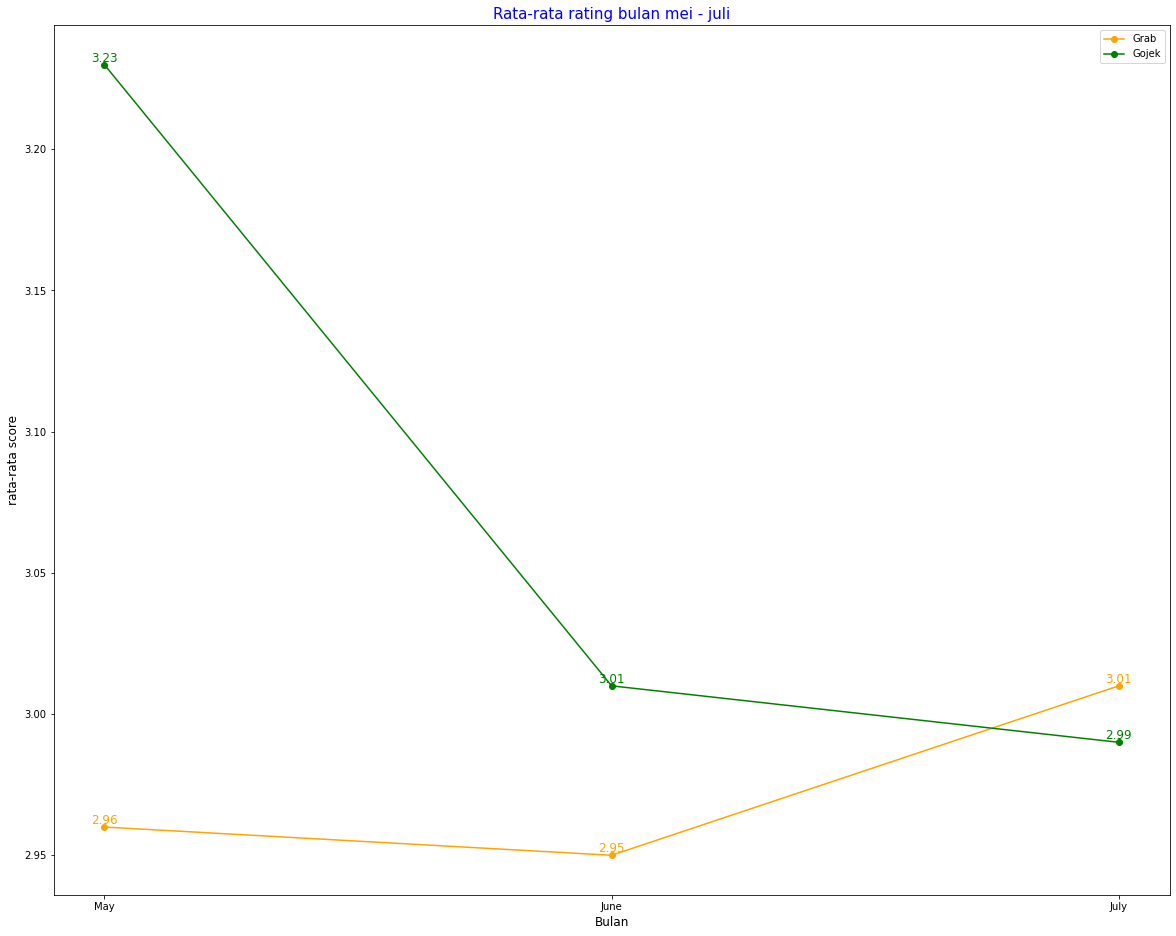

In [ ]:
fig = plt.figure(figsize=(20,16))
plt.plot(df_new_plot.Date, df_new_plot.GrabScore, label="Grab", color='orange', marker='o')
plt.plot(df_new_plot.Date, df_new_plot.GojekScore, label="Gojek", color='green', marker='o')
plt.title('Rata-rata rating bulan mei - juli', fontsize=15, color='blue')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('rata-rata score', fontsize=12)


def anotation_data(data_y, color_text):
  for i,j in zip(df_new_plot.Date, data_y):
    plt.annotate(str(j), xy=(i,j), color=color_text,
                  fontsize='large', weight='normal',
                  horizontalalignment = 'center',
                 verticalalignment='bottom'
                 )

anotation_data(df_new_plot.GrabScore, 'orange')
anotation_data(df_new_plot.GojekScore, 'green')

plt.legend()
plt.show()

# Weekly Average Rating

In [ ]:
df = pd.DataFrame(app_reviews)
df = df.set_index('appId', inplace=False)
df = df.loc['com.grabtaxi.passenger']
df.reset_index(level=0, inplace=True)

df= df.sort_values(["reviewCreatedVersion"])

In [ ]:
print(df.head())

                      appId  ... sortOrder
376  com.grabtaxi.passenger  ...    newest
629  com.grabtaxi.passenger  ...    newest
338  com.grabtaxi.passenger  ...    newest
143  com.grabtaxi.passenger  ...    newest
734  com.grabtaxi.passenger  ...    newest

[5 rows x 12 columns]


In [ ]:
df = df[["reviewCreatedVersion", "score"]]

In [ ]:
print(df.head())

    reviewCreatedVersion  score
376               4.27.2      2
629               4.29.1      3
338               4.34.1      2
143               4.46.2      1
734               4.52.2      3


In [ ]:
df.shape

(1199, 2)

In [ ]:
print(df.reviewCreatedVersion.unique())

['4.27.2' '4.29.1' '4.34.1' '4.46.2' '4.52.2' '5.118.0' '5.119.0'
 '5.121.0' '5.122.1' '5.126.0' '5.127.0' '5.128.2' '5.131.0' '5.133.0'
 '5.134.0' '5.135.0' '5.136.0' '5.137.0' '5.138.0' '5.140.0' '5.141.0'
 '5.142.0' '5.143.0' '5.144.0' '5.145.0' '5.146.0' '5.147.0' '5.148.0'
 '5.149.1' '5.150.0' '5.151.0' '5.152.0' '5.153.0' '5.154.0' '5.155.0'
 '5.155.1' '5.156.0' '5.157.0' '5.158.0' '5.159.0' '5.160.0' '5.24.1'
 '5.40.1' '5.42.0' '5.48.1' '5.51.0' '5.54.2' '5.55.1' '5.57.0' '5.60.0'
 '5.64.0' '5.65.0' '5.68.0' '5.71.0' '5.74.1' '5.76.1' '5.83.0' '5.87.0'
 '5.88.0' '5.90.1' None]


In [ ]:
df.isna().sum()

reviewCreatedVersion    156
score                     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
score = {}
df_sementara  = df

for k in df.reviewCreatedVersion.unique():
  df_sementara = df[df['reviewCreatedVersion'] == k]
  score[k] = df_sementara.score.mean()

print(score)

{'4.27.2': 2.0, '4.29.1': 3.0, '4.34.1': 2.0, '4.46.2': 1.0, '4.52.2': 3.0, '5.118.0': 4.0, '5.119.0': 1.0, '5.121.0': 4.0, '5.122.1': 4.0, '5.126.0': 1.0, '5.127.0': 3.0, '5.128.2': 2.0, '5.131.0': 3.5, '5.133.0': 2.0, '5.134.0': 1.0, '5.135.0': 3.1666666666666665, '5.136.0': 3.0, '5.137.0': 4.25, '5.138.0': 3.0, '5.140.0': 2.6666666666666665, '5.141.0': 3.0, '5.142.0': 3.4615384615384617, '5.143.0': 2.8125, '5.144.0': 3.727272727272727, '5.145.0': 2.739130434782609, '5.146.0': 2.4838709677419355, '5.147.0': 3.7142857142857144, '5.148.0': 3.0833333333333335, '5.149.1': 3.0, '5.150.0': 3.081081081081081, '5.151.0': 3.35, '5.152.0': 3.189189189189189, '5.153.0': 2.8636363636363638, '5.154.0': 2.8421052631578947, '5.155.0': 2.6875, '5.155.1': 3.1315789473684212, '5.156.0': 2.795275590551181, '5.157.0': 3.056451612903226, '5.158.0': 3.1923076923076925, '5.159.0': 3.3205128205128207, '5.160.0': 4.5, '5.24.1': 2.0, '5.40.1': 3.0, '5.42.0': 1.0, '5.48.1': 4.0, '5.51.0': 3.0, '5.54.2': 4.0, '

In [ ]:
df_score_grab_by_version = pd.DataFrame(score.items())
print(df_score_grab_by_version.head(10))

         0    1
0   4.27.2  2.0
1   4.29.1  3.0
2   4.34.1  2.0
3   4.46.2  1.0
4   4.52.2  3.0
5  5.118.0  4.0
6  5.119.0  1.0
7  5.121.0  4.0
8  5.122.1  4.0
9  5.126.0  1.0


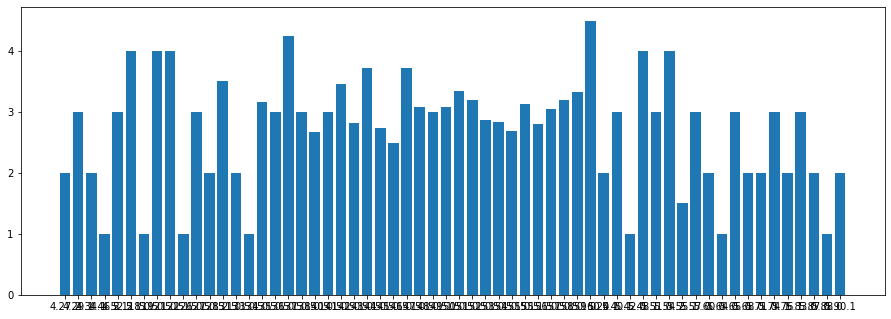

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(df_score_grab_by_version[0], df_score_grab_by_version[1])
plt.show()

In [ ]:
pembatas= int(len(df_score_grab_by_version[1])/3)
firsthalf = df_score_grab_by_version.iloc[:pembatas]
half = df_score_grab_by_version.iloc[pembatas:pembatas*2]
lasthalf = df_score_grab_by_version.iloc[pembatas*2:pembatas*3]

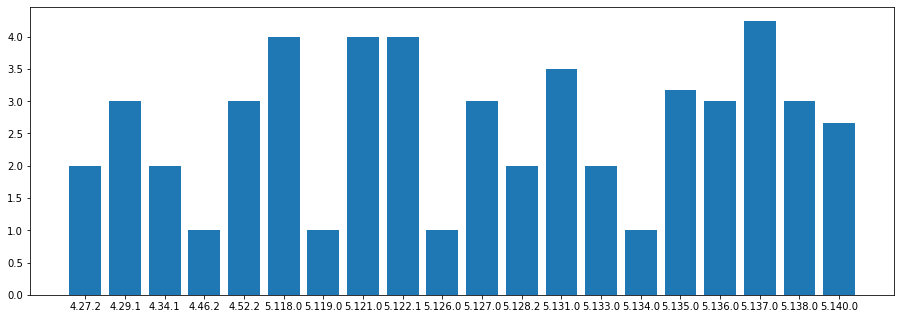

In [ ]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,2,1])
ax.bar(firsthalf[0], firsthalf[1])
plt.show()

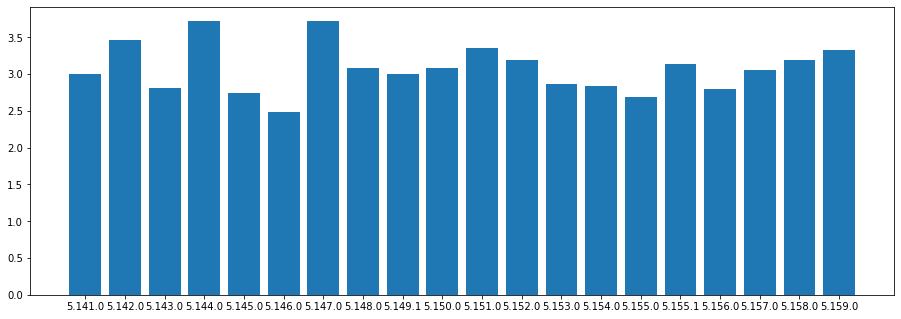

In [ ]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,2,1])
ax.bar(half[0], half[1])
plt.show()

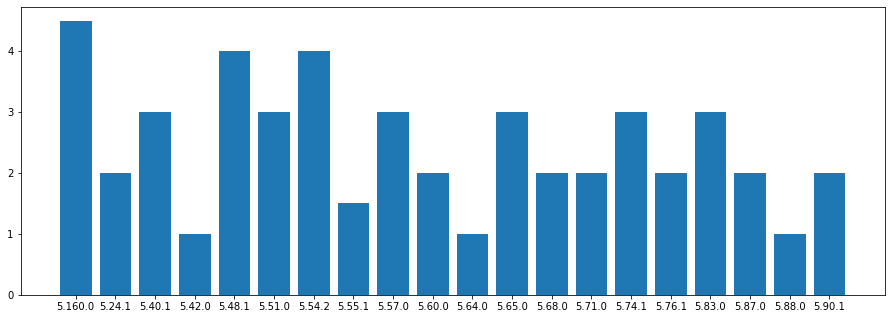

In [ ]:
fig3 = plt.figure()
ax = fig3.add_axes([0,0,2,1])
ax.bar(lasthalf[0], lasthalf[1])
plt.show()

In [ ]:
fig1.savefig(path+'review1.pdf', bbox_inches='tight')
fig2.savefig(path+'review2.pdf', bbox_inches='tight')
fig3.savefig(path+'review3.pdf', bbox_inches='tight')

#Split DataFrame to Data train and test

In [ ]:
df = pd.DataFrame(app_reviews)
df = df.set_index('appId', inplace=False)
df = df.loc['com.grabtaxi.passenger']
df.reset_index(level=0, inplace=True)

df = df[["content", "score"]]


In [ ]:
df.isna().sum()

content    0
score      0
dtype: int64

In [ ]:
#sentimen jelek jika score < 3
#sentimen baik jika score >3
# score == 3 akan kita hilangkan

df = df[df['score'] != 3]

In [ ]:
df.isna().sum()

content    0
score      0
dtype: int64

In [ ]:
train, test = train_test_split(df, test_size = 0.2)

In [ ]:
print(train.head())

                                                content  score
1086  Aman, nyaman dan drivernya disiplin pakai mask...      5
866   App Grab sy tdk bisa dibuka. Sudah dicoba masu...      4
1129      Tiap kali perlu grab, tiap kali minta upgrade      5
1003  Saya beri bintang 5 ya. Tolong akun saya di fi...      5
962   Belakangan ini sering suruh update disaat mend...      4


In [ ]:
print(test.head())

                                                content  score
1032  Selama pandemi ini alhamdulillah terbantu bang...      5
1024  Aku kasi bintang 5 untuk Grab Apps. Beli Obat,...      5
1020  Grab express sangat membantu skali utk kita pe...      5
138   sekarang mahal pake go food ada biaya jasa apl...      1
827   Pelayanan driver ok, hanya terkadang ongkirnya...      4


# Create Sentiment

In [ ]:
train.loc[train.score > 3, 'sentiment'] = 1
train.loc[train.score < 3, 'sentiment'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
test.loc[test.score >3, 'sentiment'] = 1
test.loc[test.score <3, 'sentiment'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

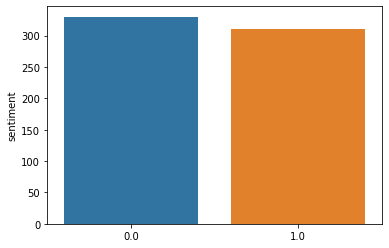

In [ ]:
plot = sns.barplot(y = train.sentiment.value_counts(), x= train.sentiment.value_counts().index)

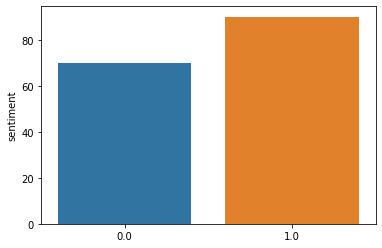

In [ ]:
plot = sns.barplot(y = test.sentiment.value_counts(), x= test.sentiment.value_counts().index)

In [ ]:
def cleansing(text):
  word_list = word_tokenize(text)
  word_list =[word for word in word_list if len(word) > 2 and word.isalnum() ]
  word_list = [word for word in word_list if string.punctuation not in word]
  text = ' '.join(word_list)

  return text

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
train['content_cleansing'] = train.content.apply(cleansing)
test['content_cleansing'] = test.content.apply(cleansing)

In [ ]:
print(train.content_cleansing)

1086    Aman nyaman dan drivernya disiplin pakai maske...
866     App Grab tdk bisa dibuka Sudah dicoba masuk ak...
1129         Tiap kali perlu grab tiap kali minta upgrade
1003    Saya beri bintang Tolong akun saya fix untuk p...
962     Belakangan ini sering suruh update disaat mend...
                              ...                        
1045    Aplikasi aneh lakuin apa2 suspend udah setahun...
270     Saya pengguna baru grab saya isi ovo grab 300k...
194     ampunnnnn aplikasinya makin hari makin ada2 aj...
127     Udah pesan driver lama kelokasi seperti tidak ...
1105                                                     
Name: content_cleansing, Length: 640, dtype: object


In [ ]:
train.isna().sum()

content              0
score                0
sentiment            0
content_cleansing    0
dtype: int64

In [ ]:
test.isna().sum()

content              0
score                0
sentiment            0
content_cleansing    0
dtype: int64

# Extraction

In [ ]:
cv = CountVectorizer()
X_train = cv.fit_transform(train.content_cleansing)
X_test = cv.transform(test.content_cleansing)

#Model

In [ ]:
#Model
model_mnb = MultinomialNB()
model_mnb.fit(X_train, train.sentiment)
y_pred = model_mnb.predict(X_test)
y_pred = y_pred.astype(np.int16)

#Eval

In [ ]:
f1_score(test.sentiment.astype(np.int16), y_pred)

0.7417218543046358

In [ ]:
precision_score(test.sentiment, y_pred)

0.9180327868852459

In [ ]:
recall_score(test.sentiment, y_pred)

0.6222222222222222

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0], dtype=int16)

In [ ]:
confusion_matrix(test.sentiment, y_pred, labels= [0,1])

array([[65,  5],
       [34, 56]])

In [ ]:
test.sentiment.value_counts()

1.0    90
0.0    70
Name: sentiment, dtype: int64